In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_straw=pd.read_csv('MercerHall_WheatStraw.csv',sep=",",header=None)
df_grain=pd.read_csv('MercerHall_WheatGrain.csv',sep=",",header=None)

/Users/jhasneha/.virtualenvs/indot/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [22]:
grain=np.array(df_grain).flatten()
straw=np.array(df_straw).flatten()
print("the max and min weights of grain harvested were ", np.amax(grain), np.amin(grain))
print("the max and min weights of straw harvested were ", np.amax(straw), np.amin(straw))


the max and min weights of grain harvested were  5.16 2.73
the max and min weights of straw harvested were  8.85 4.1


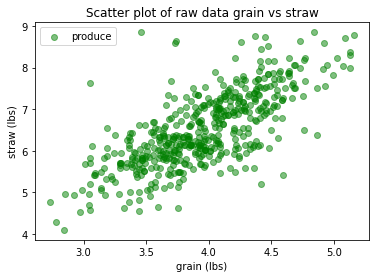

In [3]:
plt.scatter(grain, straw, color="green", alpha=0.5, label="produce")
plt.xlabel("grain (lbs)")
plt.ylabel("straw (lbs)")

plt.legend(loc='upper left')
plt.title("Scatter plot of raw data grain vs straw")
plt.show()

## Plot for the fig.6 mercer and hall

    


    

In [17]:
df_grain_flat=pd.DataFrame(pd.Series(grain))
df_straw_flat=pd.DataFrame(pd.Series(straw))
df_grain_flat = df_grain_flat.rename(columns={0: 'Grain'})
df_straw_flat = df_straw_flat.rename(columns={0: 'Straw'})
df_grain_stat=df_grain_flat.join(df_straw_flat, lsuffix='_g', rsuffix='_s')


In [18]:
df_grain_stat["group_g"]=(np.trunc(df_grain_stat["Grain"]*10))/10
dict_df=df_grain_stat.groupby(["group_g"]).mean().round(2).reset_index()
dict_gg=dict(zip(dict_df.group_g,dict_df.Grain))
df_grain_stat['Mean_g']=df_grain_stat['group_g'].map(dict_gg)
dict_sg=dict(zip(dict_df.group_g,dict_df.Straw))
df_grain_stat['Mean_s']=df_grain_stat['group_g'].map(dict_sg)

The plots are grouped by 0.1 lbs ie(Ex. 2.80-2.89 = 2.8)

In [23]:
df_grain_stat=df_grain_stat.drop_duplicates(subset=["Mean_g"])
df_grain_stat=df_grain_stat.sort_values(by='Mean_g',ascending=True)
df_grain_stat.head()

,Grain,Straw,group_g,Mean_g,Mean_s
173,2.78,4.28,2.7,2.76,4.53
248,2.84,4.10,2.8,2.84,4.53
22,2.97,4.53,2.9,2.96,4.85
4,3.04,4.71,3.0,3.06,5.56
21,3.17,4.95,3.1,3.17,5.58


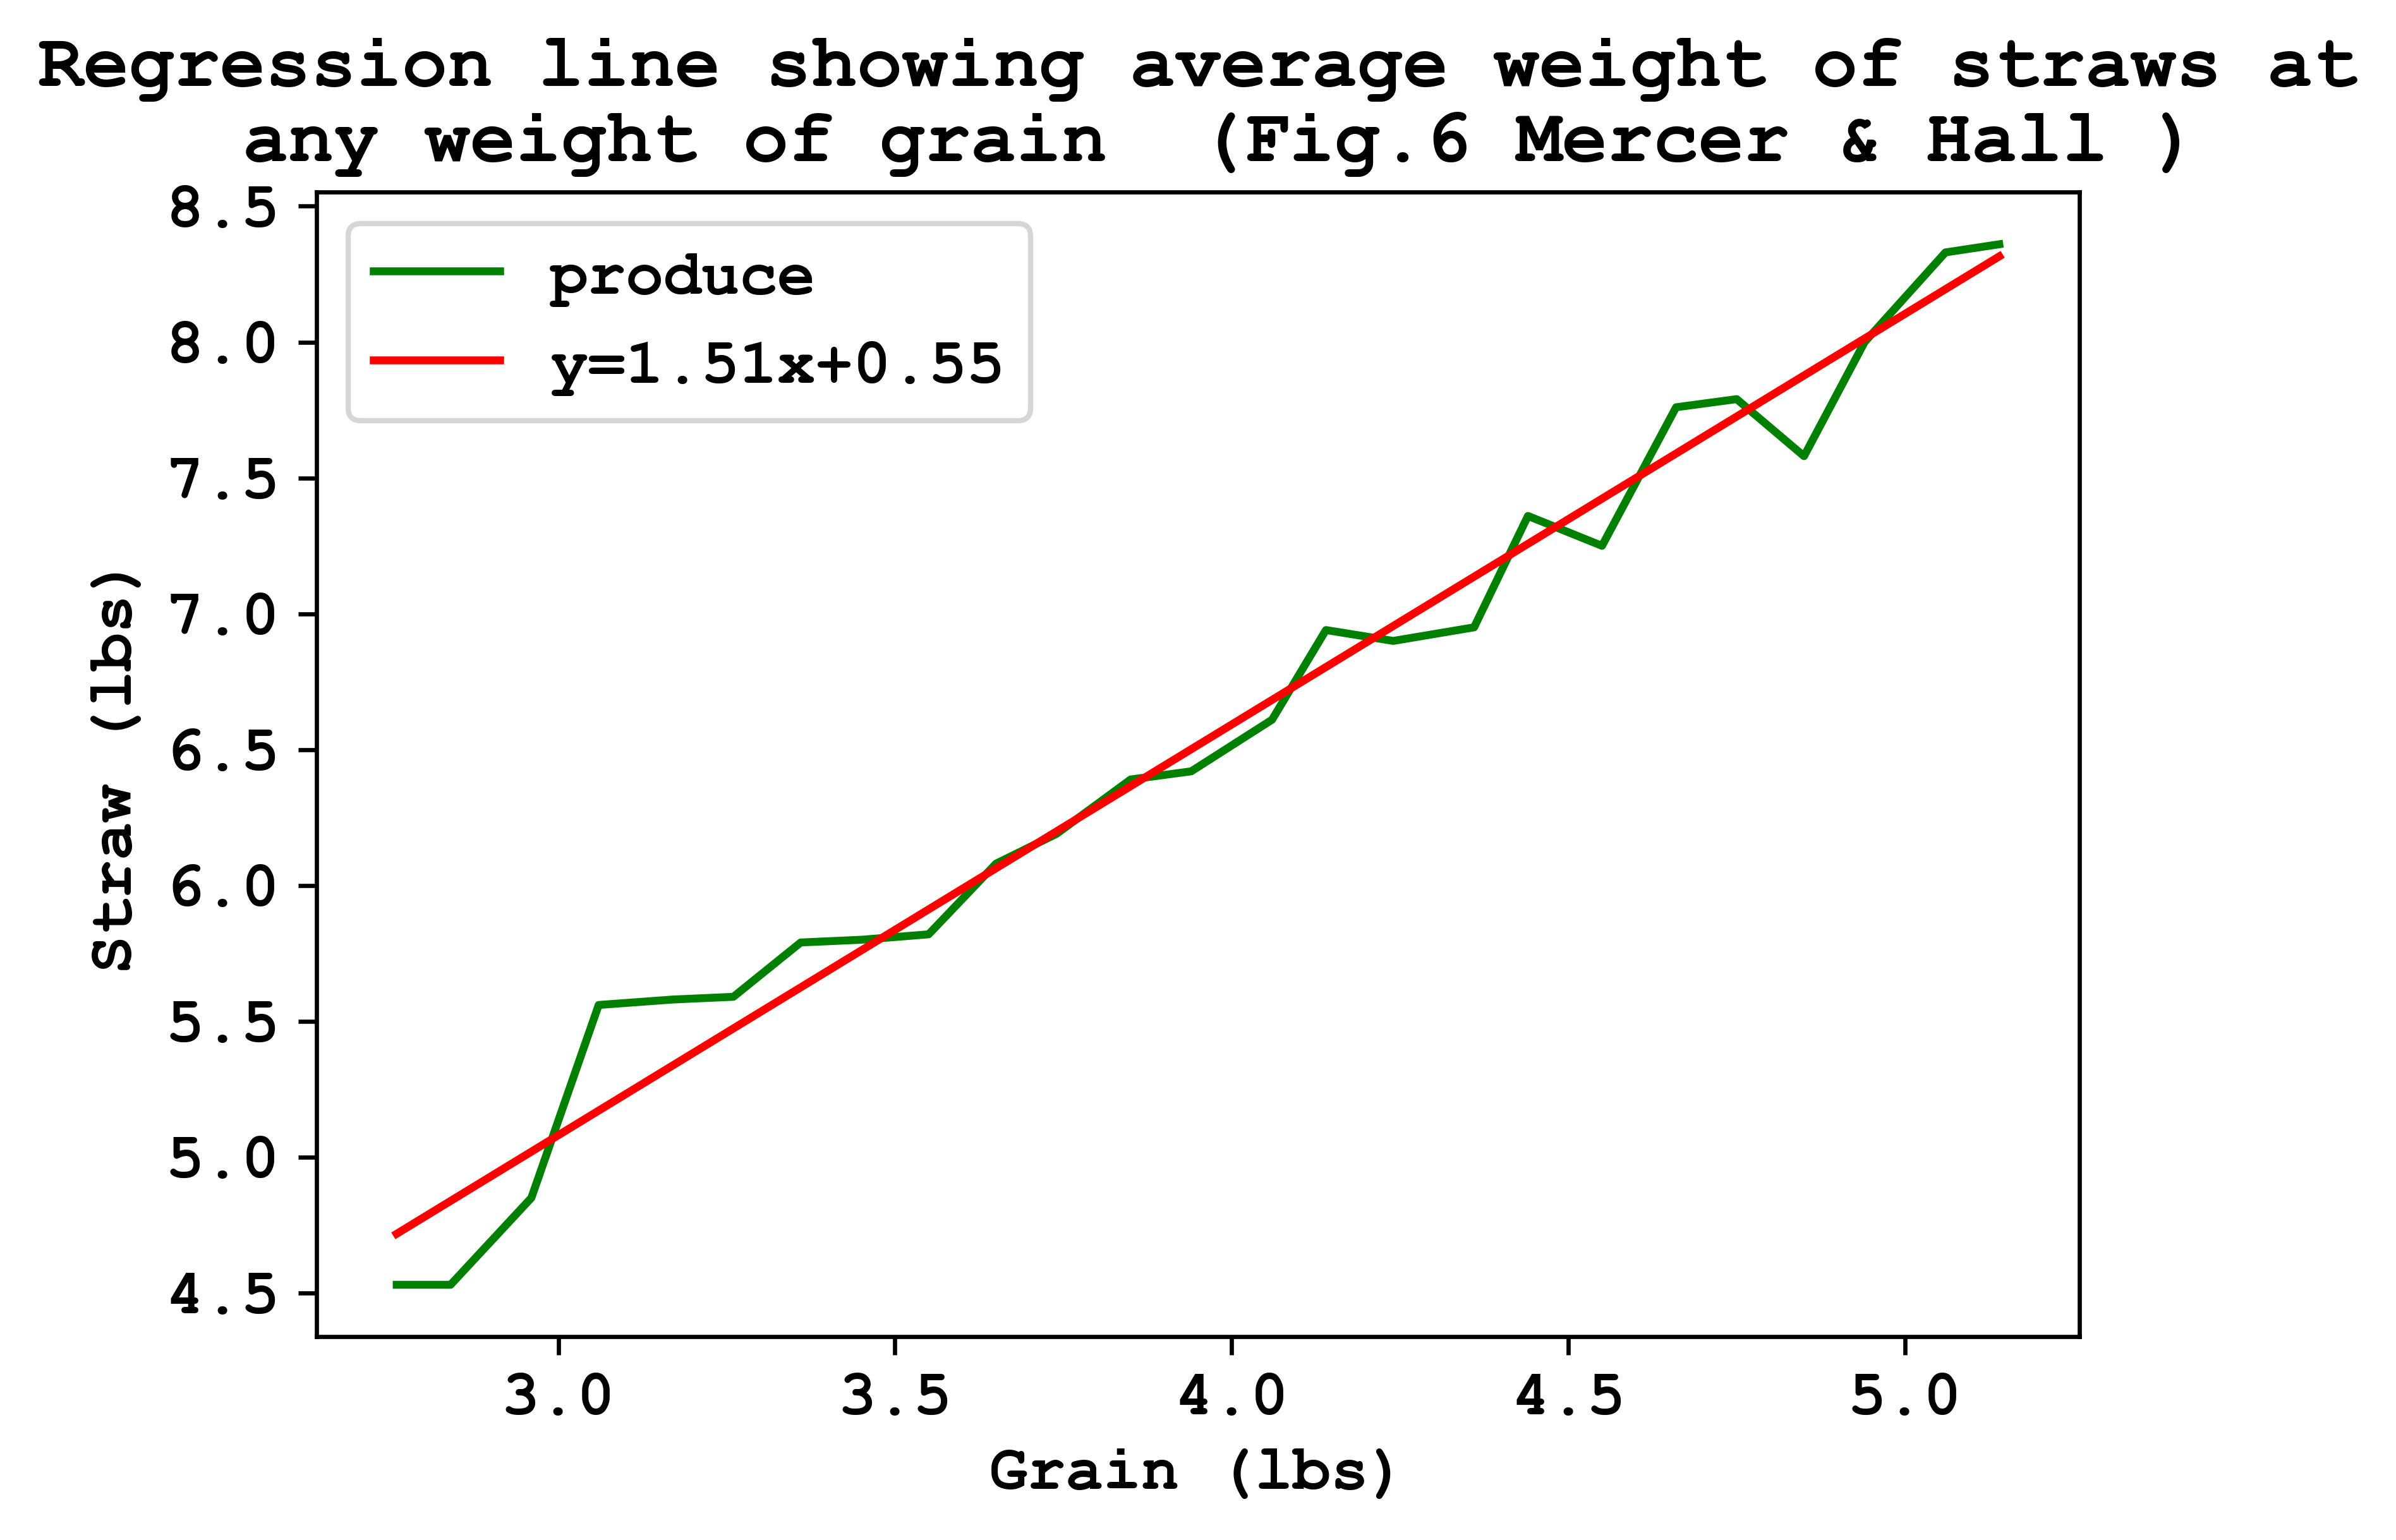

In [20]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
from matplotlib import pyplot
from scipy import stats
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12


x=df_grain_stat["Mean_g"]
y=df_grain_stat["Mean_s"]
ax=plt.subplot()
plt.plot(x,y , color="green", alpha=1, label="produce")
plt.xlabel("Grain (lbs)",fontweight= "bold")
plt.ylabel("Straw (lbs)", fontweight= "bold")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'red', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Regression line showing average weight of straws at\n any weight of grain  (Fig.6 Mercer & Hall )",fontweight= "bold")
plt.legend(loc='upper left')


plt.show()






## Plot for Fig.7 Mercer and Hall


In [28]:
df_grain_flat["group_g"]=(np.trunc(df_grain_flat["Grain"]*10))/10
dict_df=df_grain_flat.groupby(["group_g"]).mean().round(2).reset_index()
dict_gg=dict(zip(dict_df.group_g,dict_df.Grain))
df_grain_flat['Mean_g']=df_grain_flat['group_g'].map(dict_gg)

In [29]:
bins = np.arange(start=2.4,stop=5.6, step=0.2)
df_grain_flat['binned'] = pd.cut(df_grain_flat['group_g'], bins)
df_grain_flat['Bin_l'] = df_grain_flat.iloc[:, 3].apply(lambda x: '{}'.format(x.left )).astype(float)
df_grain_flat['Bin_r'] = df_grain_flat.iloc[:, 3].apply(lambda x: '{}'.format(x.right )).astype(float)
df_grain_flat.head()

,Grain,group_g,Mean_g,binned,Bin_l,Bin_r
0,3.63,3.6,3.65,"(3.4, 3.6]",3.4,3.6
1,4.15,4.1,4.14,"(4.0, 4.2]",4.0,4.2
2,4.06,4.0,4.06,"(3.8, 4.0]",3.8,4.0
3,5.13,5.1,5.14,"(5.0, 5.2]",5.0,5.2
4,3.04,3.0,3.06,"(2.8, 3.0]",2.8,3.0


In [31]:
df_vc_g=df_grain_flat["Bin_r"].value_counts(bins=13,sort=False)
df_vc_g=df_vc_g.reset_index()
df_vc_g=df_vc_g.rename(columns={"Bin_r": "Count"})
df_vc_g['Bin_left'] = df_vc_g.iloc[:, 0].apply(lambda x: '{}'.format(x.left )).astype(float)
df_vc_g['Bin_right'] = df_vc_g.iloc[:, 0].apply(lambda x: '{}'.format(x.right )).astype(float)
df_vc_g['Bin_right']=(np.trunc(df_vc_g['Bin_right']*10))/10
df_vc_g.head()

,index,Count,Bin_left,Bin_right
0,"(2.797, 2.985]",4,2.797,2.9
1,"(2.985, 3.169]",15,2.985,3.1
2,"(3.169, 3.354]",20,3.169,3.3
3,"(3.354, 3.538]",47,3.354,3.5
4,"(3.538, 3.723]",63,3.538,3.7


In [32]:
def normal_dist(x , mean , sd):
    prob_density = (((1/np.sqrt(np.pi*(sd**2)*2))) * np.exp(-0.5*((x-mean)/sd)**2))
    return prob_density

#df_grain_flat["PDF"]=normal_dist(df_grain_flat["Mean_g"],mean,sd)

In [33]:
sd=df_grain_flat["Mean_g"].std()
mean=df_grain_flat["Mean_g"].mean()
df_grain_flat["PDF"]=normal_dist(df_grain_flat["Mean_g"],mean,sd)
df_grain_flat=df_grain_flat.sort_values(by='Mean_g',ascending=True)
df_grain_flat.head()
#plt.plot(df_grain_flat["Mean_g"],df_grain_flat["PDF"] , color="red", alpha=1, label="Theoretical")

,Grain,group_g,Mean_g,binned,Bin_l,Bin_r,PDF
441,2.73,2.7,2.76,"(2.6, 2.8]",2.6,2.8,0.029804
173,2.78,2.7,2.76,"(2.6, 2.8]",2.6,2.8,0.029804
248,2.84,2.8,2.84,"(2.6, 2.8]",2.6,2.8,0.046237
466,2.85,2.8,2.84,"(2.6, 2.8]",2.6,2.8,0.046237
391,2.92,2.9,2.96,"(2.8, 3.0]",2.8,3.0,0.084366


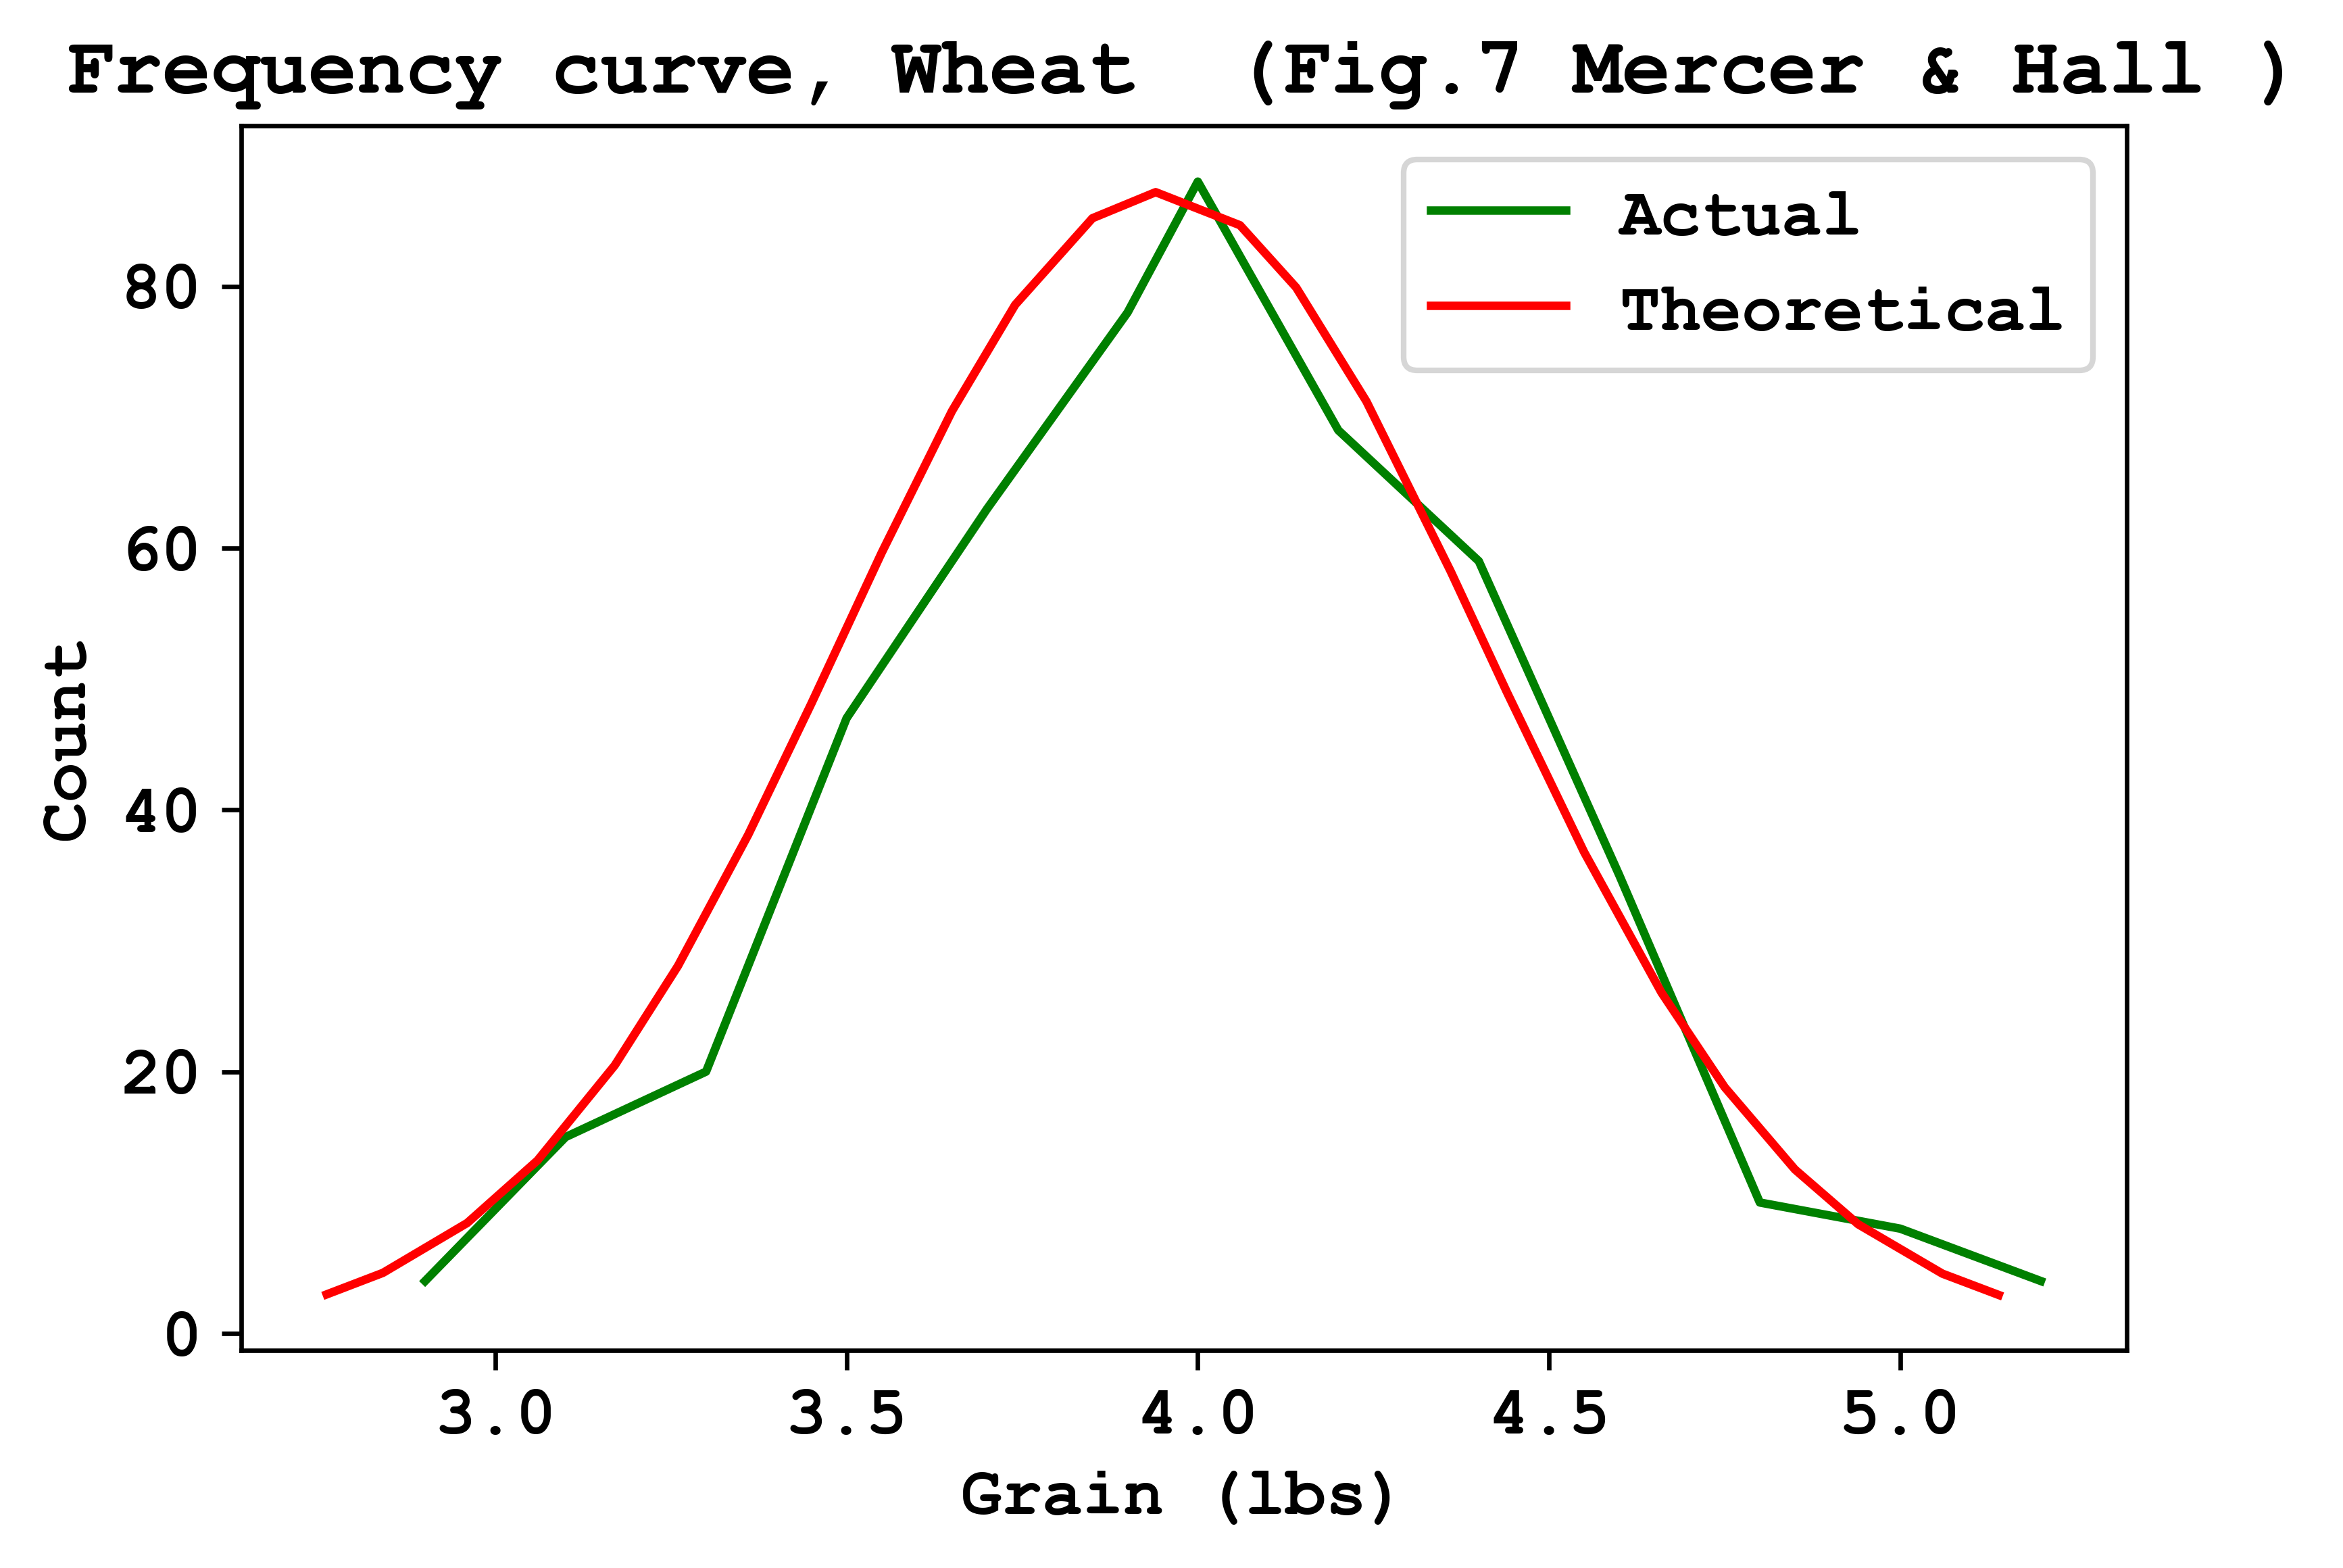

In [35]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
from matplotlib import pyplot
from scipy import stats
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12

fig,ax=plt.subplots()
ax1=ax
ax.plot(df_vc_g["Bin_right"],df_vc_g["Count"] , color="green", alpha=1, label="Actual")
ax1.plot(df_grain_flat["Mean_g"],df_grain_flat["PDF"]*100, color="red", alpha=1, label="Theoretical")

ax.set_xlabel("Grain (lbs)", fontweight="bold")
ax.set_ylabel("Count", fontweight="bold")
plt.title("Frequency curve, Wheat  (Fig.7 Mercer & Hall )",fontweight= "bold")
plt.legend(loc='upper right')



## Plot for Mercer and Hall Fig.8


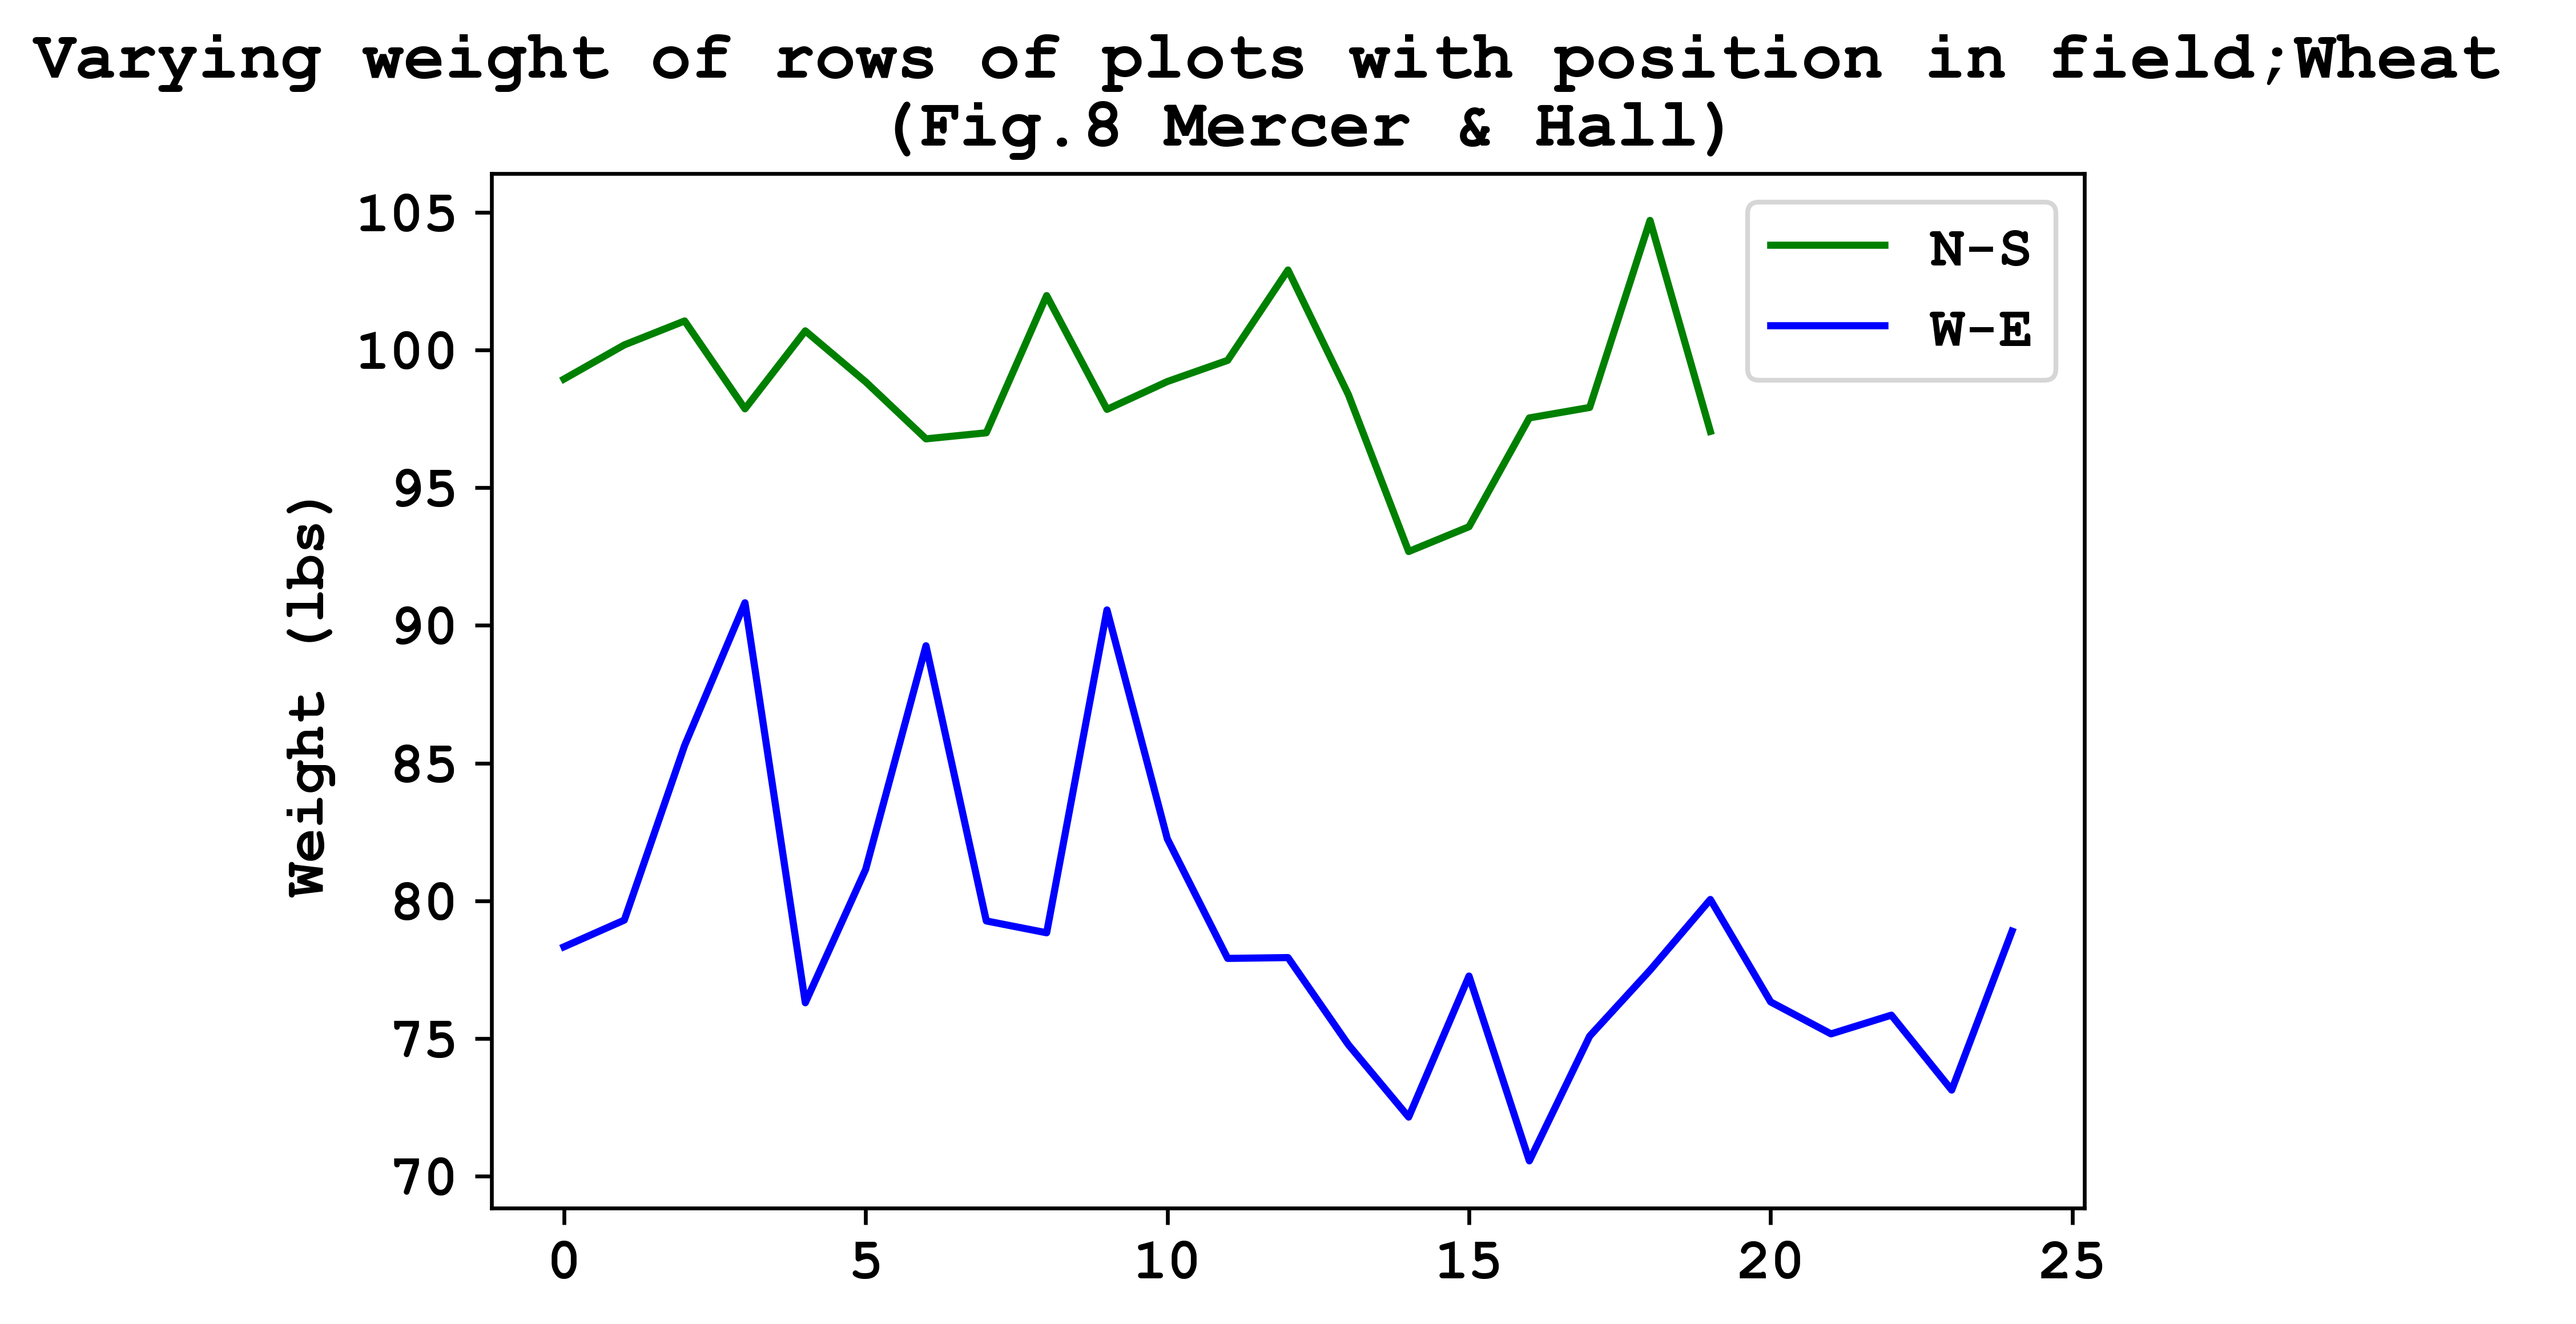

In [35]:
df_col=df_grain.sum(axis=1)
df_row=df_grain.sum(axis=0)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
from matplotlib import pyplot
from scipy import stats
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 12
plt.plot(df_col,  color="green", alpha=1, label="N-S")
plt.plot(df_row,  color="blue", alpha=1, label="W-E")
plt.title("Varying weight of rows of plots with position in field;Wheat \n (Fig.8 Mercer & Hall)", fontweight="bold")
plt.ylabel("Weight (lbs)", fontweight="bold")
plt.legend(loc="upper right")

## Plot for Fig.9 of Mercer and Hall

- the next section is the create_plots function which creates different   size plots selecting and aggregating random plots in no order selected by np.random.randint function.

- This function returns a series of aggregated plot grain weights


The `create_plots` function is called here inside the for loop to append the plots into a single list

In [87]:
#%%
def create_plots(plot_size,size_row,size_col):
    rand_index=np.random.randint(499, size=(size_row, size_col))
    arr_250=np.take(grain, rand_index)
    arr_250_s=np.sum(arr_250, axis=0)
    df_theoretical=pd.DataFrame()
    df_theoretical=pd.DataFrame(pd.Series(arr_250_s))
    df_theoretical.columns=[plot_size]
    return (df_theoretical)



In [88]:
list_plot=[500,250,125,100,50,25,10]
df_th=pd.DataFrame()
list_th=[]
for x in list_plot:
    c=500//x
    r=x
    plot_size="1/"+ str(x)
    df=pd.DataFrame(create_plots(plot_size,c,r))
    #print(df.head())
    #print(df.head())
    list_th.append(df)
    print(len(list_th))
df_th=pd.concat(list_th)

1
2
3
4
5
6
7


## the plots are designed in various shapes for comparing standards deviation percentage of actual values (from designed plots , calculated in next 7 cells) to theoretical values (calculated in the previous cell) 

In [109]:
# 1/500 plot size with 1*1 (r*c)

df_actual=pd.DataFrame()
df_actual=df_grain_flat[["Grain"]].copy()
df_actual=df_actual.rename(columns={"Grain":"1/500"})


In [110]:
# 1/250 plot size with 2*1 (r*c)


df1=df_grain.iloc[lambda x: x.index % 2 == 0].reset_index(drop=True)
df2=df_grain.iloc[lambda x: x.index % 2 == 1].reset_index(drop=True)

df5=(df1+df2).T
df5=np.array(df5).reshape(-1)

df_actual["1/250"]=pd.DataFrame(pd.Series(df5))

In [111]:
# 1/125 plot size with 4*1 (r*c)

df1=df_grain.iloc[lambda x: x.index % 4 == 0].reset_index(drop=True)
df2=df_grain.iloc[lambda x: x.index % 4 == 1].reset_index(drop=True)
df3=df_grain.iloc[lambda x: x.index % 4 == 2].reset_index(drop=True)
df4=df_grain.iloc[lambda x: x.index % 4 == 3].reset_index(drop=True)

df5=(df1+df2+df3+df4).T
df5=np.array(df5).reshape(-1)

df_actual["1/125"]=pd.DataFrame(pd.Series(df5))

In [112]:
# 1/100 plot size with 1*5 (r*c)

list_split= np.array_split(grain,100)
df_split=pd.DataFrame(list(map(np.ravel,list_split )))
df_actual["1/100"]=df_split.sum(axis=1)

In [113]:
# 1/50 plot size with 2*5 (r*c)

df1=df_grain.iloc[lambda x: x.index % 2 == 0].reset_index(drop=True)
df2=df_grain.iloc[lambda x: x.index % 2 == 1].reset_index(drop=True)
df3=(df1+df2)
grain_50=np.array(df3).flatten()
list_split= np.array_split(grain_50,50)
df_split=pd.DataFrame(list(map(np.ravel,list_split )))
df_actual["1/50"]=df_split.sum(axis=1)

In [114]:
# 1/25 plot size with 4*5 (r*c)

n = 4  #chunk row size
list_df = [df_grain[i:i+n] for i in range(0,df_grain.shape[0],n)]
list_item=[]
for item in list_df:
    list_item.append(item.sum(axis=0))


grain_25=np.array(list_item).reshape(-1)
split= pd.DataFrame(np.array_split(grain_25,25))
df_actual["1/25"]=split.sum(axis=1)

In [115]:
# 1/10 plot size with 10*5 (r*c)
df1=df_grain.iloc[lambda x: x.index / 10 < 1].reset_index(drop=True)
df2=df_grain.iloc[lambda x: x.index / 10 >= 1].reset_index(drop=True)
df1=df1.sum()
df2=df2.sum()
list_split= np.array_split(df1,5)
list_split1= np.array_split(df2,5)
df_split=pd.DataFrame(list(map(np.ravel,list_split ))).sum(axis=1)
df_split1=pd.DataFrame(list(map(np.ravel,list_split1 ))).sum(axis=1)

df_actual["1/10"]=pd.concat([df_split, df_split1], ignore_index=True)



In [118]:
df_actual.sort_index()

,1/500,1/250,1/125,1/100,1/50,1/25,1/10
0,3.63,7.70,16.11,20.01,41.11,82.89,201.46
1,4.15,8.41,13.39,21.41,42.51,83.05,209.42
2,4.06,6.79,15.19,20.53,40.32,78.63,190.93
3,5.13,6.60,17.57,18.73,38.53,78.76,200.92
4,3.04,7.37,16.07,18.26,36.65,74.70,188.40
...,...,...,...,...,...,...,...
495,3.71,NaN,NaN,NaN,NaN,NaN,NaN
496,3.54,NaN,NaN,NaN,NaN,NaN,NaN
497,3.59,NaN,NaN,NaN,NaN,NaN,NaN
498,3.76,NaN,NaN,NaN,NaN,NaN,NaN


## dataframe with actual and theoretical values calculated by (df.std()/df.mean())*100

In [119]:

#Create the std_deviation table for theoretical and actual values of different shapes of plots
cv_th=((df_th.std()/df_th.mean())*100).reset_index()
cv_th.columns=["size of plot","Theoretical_CV"]
print("Theoretical std/mean values : ", cv_th)

cv_ac=((df_actual.std()/df_actual.mean())*100).reset_index()
cv_ac.columns=["size of plot","Actual_CV"]
print("Actual std/mean values : ", cv_ac)



Theoretical std/mean values :    size of plot  Theoretical_CV
0        1/500       11.861518
1        1/250        8.043790
2        1/125        5.467105
3        1/100        4.764195
4         1/50        3.712523
5         1/25        2.112747
6         1/10        1.739936
Actual std/mean values :    size of plot  Actual_CV
0        1/500  11.606011
1        1/250  10.087663
2        1/125   8.903368
3        1/100   7.022854
4         1/50   6.333805
5         1/25   5.789656
6         1/10   5.205614


## converting string values to fraction values for fractional representation on x-axis

In [101]:
from fractions import Fraction
input_string = '["1/500","1/250","1/125","1/100","1/50","1/25","1/10"]'
parsed_input = [item for item in ''.join((char if char in '0123456789./' else '-') for char in input_string).split('-') if item]
output_array = [Fraction(i).limit_denominator(1000) for i in parsed_input]
print(" output array as fraction : ",output_array)


 output array as fraction :  [Fraction(1, 500), Fraction(1, 250), Fraction(1, 125), Fraction(1, 100), Fraction(1, 50), Fraction(1, 25), Fraction(1, 10)]


## Comparison of standard deviation plot

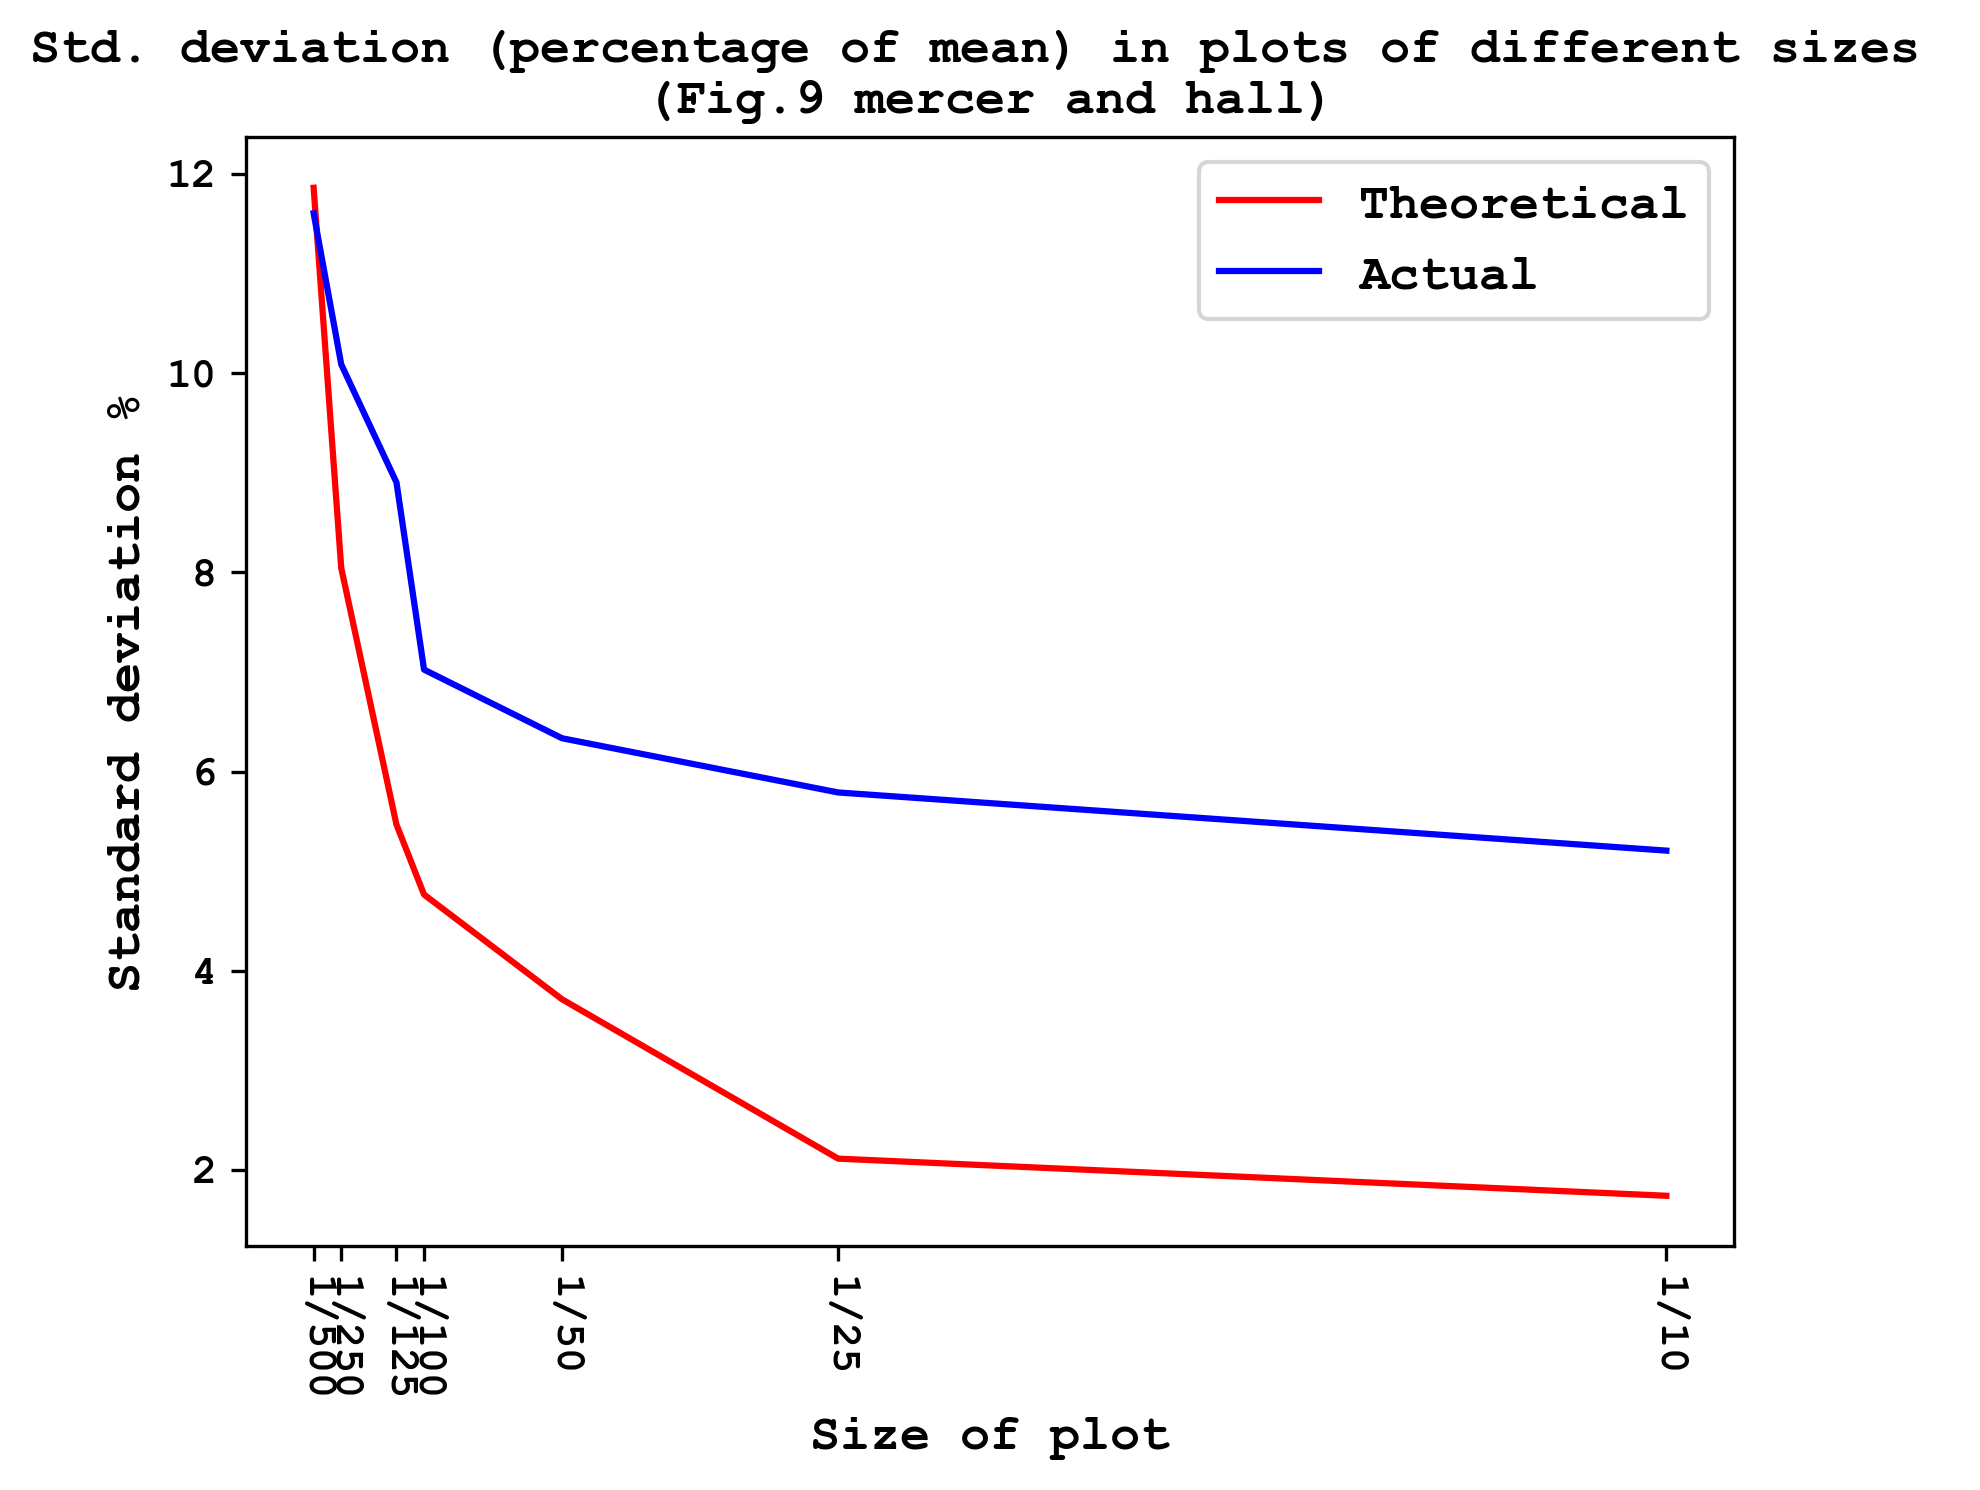

In [98]:

import matplotlib as mpl
plt.rcdefaults()
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.weight"] = "bold"
#plt.xkcd() #poison
#plt.rcdefaults()#antedote

fig, ax =plt.subplots()
ax1=ax
X_tick = [Fraction(item).limit_denominator() for item in output_array]
plt.xticks(np.unique(output_array), X_tick, rotation=270)
ax.plot(output_array,cv_th["Theoretical_CV"], color="red", alpha=1, label="Theoretical")
ax1.plot(output_array,cv_ac["Actual_CV"], color="blue", alpha=1, label="Actual")
plt.title("Std. deviation (percentage of mean) in plots of different sizes \n (Fig.9 mercer and hall) ",fontweight="bold")
ax.set_ylabel('Standard deviation %', fontsize=12,fontweight="bold")
ax.set_xlabel('Size of plot',fontsize=12,fontweight="bold")
ax.legend(fontsize=12,loc=1)

# Codes below this could be for further discussion.

In [53]:
list_plot=[500,250,125,50,25,10]
df_th=pd.DataFrame()
list_th=[]
for x in list_plot:
    c=500//x
    r=x
    plot_size="1/"+ str(x)
    print("current plot_size is: ", x)
    df=pd.DataFrame(create_plots(plot_size,c,r))
    #print(df.head())
    #print(df.head())
    list_th.append(df)
print("the number of elements in list_th : ",len(list_th))
df_th=pd.concat(list_th)

current plot_size is:  500
current plot_size is:  250
current plot_size is:  125
current plot_size is:  50
current plot_size is:  25
current plot_size is:  10
the number of elements in list_th :  6


#### The split_df function splits the array into grouped plots

     -  The grouped plots are consecutive plots of required length 
            for example:
                   -  1/50 plot size will have 50 plots 
                   -  the number of 1/500 sized plots aggregated to create 1/50 size plot = 10

In [41]:
def split_df(array,split):
    list_split= np.array_split(array,split)
    df_split=pd.DataFrame(list(map(np.ravel,list_split )))
    df_split[split]=df_split.sum(axis=1)
    return(df_split[split])

- the function `split_df` takes the 1D array **grain** and size of plot as input values. 
- The output is a list of dataframes with each dataframe holding the plot grain weight

In [51]:
list_plot=[500,250,125,50,25,10]
df_plots_grain=pd.DataFrame()
list_df=[]
for x in list_plot:
    print("plot_size :", x)
    df=pd.DataFrame(split_df(grain,x))
    #print(df.head())
    #print(df.head())
    list_df.append(df)
print("The number of elements in list_df: ", len(list_df))

plot_size : 500
plot_size : 250
plot_size : 125
plot_size : 50
plot_size : 25
plot_size : 10
The number of elements in list_df:  6


In [56]:
df_plots_grain=pd.concat(list_df)
df_plots_grain.columns=["1/10","1/25","1/50","1/125","1/250","1/500"]
df_plots_grain=df_plots_grain.iloc[:, ::-1]

##The Standard deviation calculation formula is written in the `stdev` function

In [62]:
def stdev(plot_s,df_plots_grain):
    df_stdev=df_plots_grain[[plot_s]].copy().dropna()
    #print(df_stdev.head())
    df_stdev["group_g"]=(np.trunc(df_stdev[plot_s]*10))/10
    dict_df=df_stdev.groupby(["group_g"]).mean().round(2).reset_index()
    dict_gg=dict(zip(dict_df["group_g"],dict_df[plot_s]))
    df_stdev['Mean_g']=df_stdev['group_g'].map(dict_gg)

    df_stdev_count=df_stdev["group_g"].value_counts().reset_index()
    df_stdev_count.columns=["group_g","count"]
    df_stdev_count=df_stdev_count.sort_values(by="group_g", ascending=True)
    mean_plots=df_stdev[plot_s].sum()/len(df_stdev[plot_s])
    mean_plots=mean_plots.round(1)
    print("mean_plots= ", mean_plots)
    len_col=len(df_stdev_count["group_g"])   

    n=len(df_stdev[plot_s])
    start=df_stdev_count[df_stdev_count<mean_plots].count()
    index=np.arange(start= (-1*start[0]), stop=len_col-start[0], step =1)
    print("the index column for std dev calculation",index)
    df_stdev_count=df_stdev_count.assign(coeff=index)
    df_stdev_count["count\*coeff"]= df_stdev_count["count"]*df_stdev_count["coeff"]
    df_stdev_count["count\*coeff2"]= df_stdev_count["count"]*(df_stdev_count["coeff"]**2)
    v1=(df_stdev_count["count\*coeff"].sum())/n
    v2=(df_stdev_count["count\*coeff2"].sum())/n
    sd=np.sqrt(v2-(v1**2)-(1/(len_col//2)))*0.1*np.sqrt(n/(n-1))
    mean=((df_stdev[plot_s].sum())/n) +(0.1*v1)
    sd_p=((sd/mean)*100)
    print(" the calculated standard deviation is: ", sd_p)
    return(plot_s, sd_p)

In [86]:
plot_list=["1/500","1/250","1/125","1/50","1/25","1/10"]
list_ps=[]
list_sd=[]
for index in plot_list:
    print("size of single plots: ",index)
    x=stdev(index,df_plots_grain)
    list_ps.append(x[0])
    list_sd.append(x[1])
print(list_ps, list_sd)


size of single plots:  1/500
mean_plots=  3.9
the index column for std dev calculation [-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]
 the calculated standard deviation is:  11.618433074215972
size of single plots:  1/250
mean_plots=  7.9
the index column for std dev calculation [-18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1
   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
 the calculated standard deviation is:  9.039506015704255
size of single plots:  1/125
mean_plots=  15.8
the index column for std dev calculation [-23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6
  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12
  13  14  15  16  17  18  19  20]
 the calculated standard deviation is:  6.744639492004531
size of single plots:  1/50
mean_plots=  39.5
the index column for std dev calculation [-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  

In [85]:
plot_list=["1/500","1/250","1/125","1/50","1/25","1/10"]
list_ps_th=[]
list_sd_th=[]
for index in plot_list:
    print("The size of single plot",index)
    x=stdev(index,df_th)
    list_ps_th.append(x[0])
    list_sd_th.append(x[1])

print(list_ps_th, list_sd_th)


The size of single plot 1/500
mean_plots=  3.9
the index column for std dev calculation [-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]
 the calculated standard deviation is:  11.610865928403442
The size of single plot 1/250
mean_plots=  7.9
the index column for std dev calculation [-16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1
   2   3   4   5   6   7   8   9  10  11  12  13]
 the calculated standard deviation is:  7.542439680938704
The size of single plot 1/125
mean_plots=  15.9
the index column for std dev calculation [-17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16]
 the calculated standard deviation is:  5.028147279443172
The size of single plot 1/50
mean_plots=  39.4
the index column for std dev calculation [-16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1
   2   3   4   5   6   7   8   9  

In [68]:
from fractions import Fraction
input_string = '["1/500","1/250","1/125","1/50","1/25","1/10"]'
parsed_input = [item for item in ''.join((char if char in '0123456789./' else '-') for char in input_string).split('-') if item]
output_array = [Fraction(i).limit_denominator(1000) for i in parsed_input]
print("the bin range for x axis formatted into fraction", output_array )

the bin range for x axis formatted into fraction [Fraction(1, 500), Fraction(1, 250), Fraction(1, 125), Fraction(1, 50), Fraction(1, 25), Fraction(1, 10)]


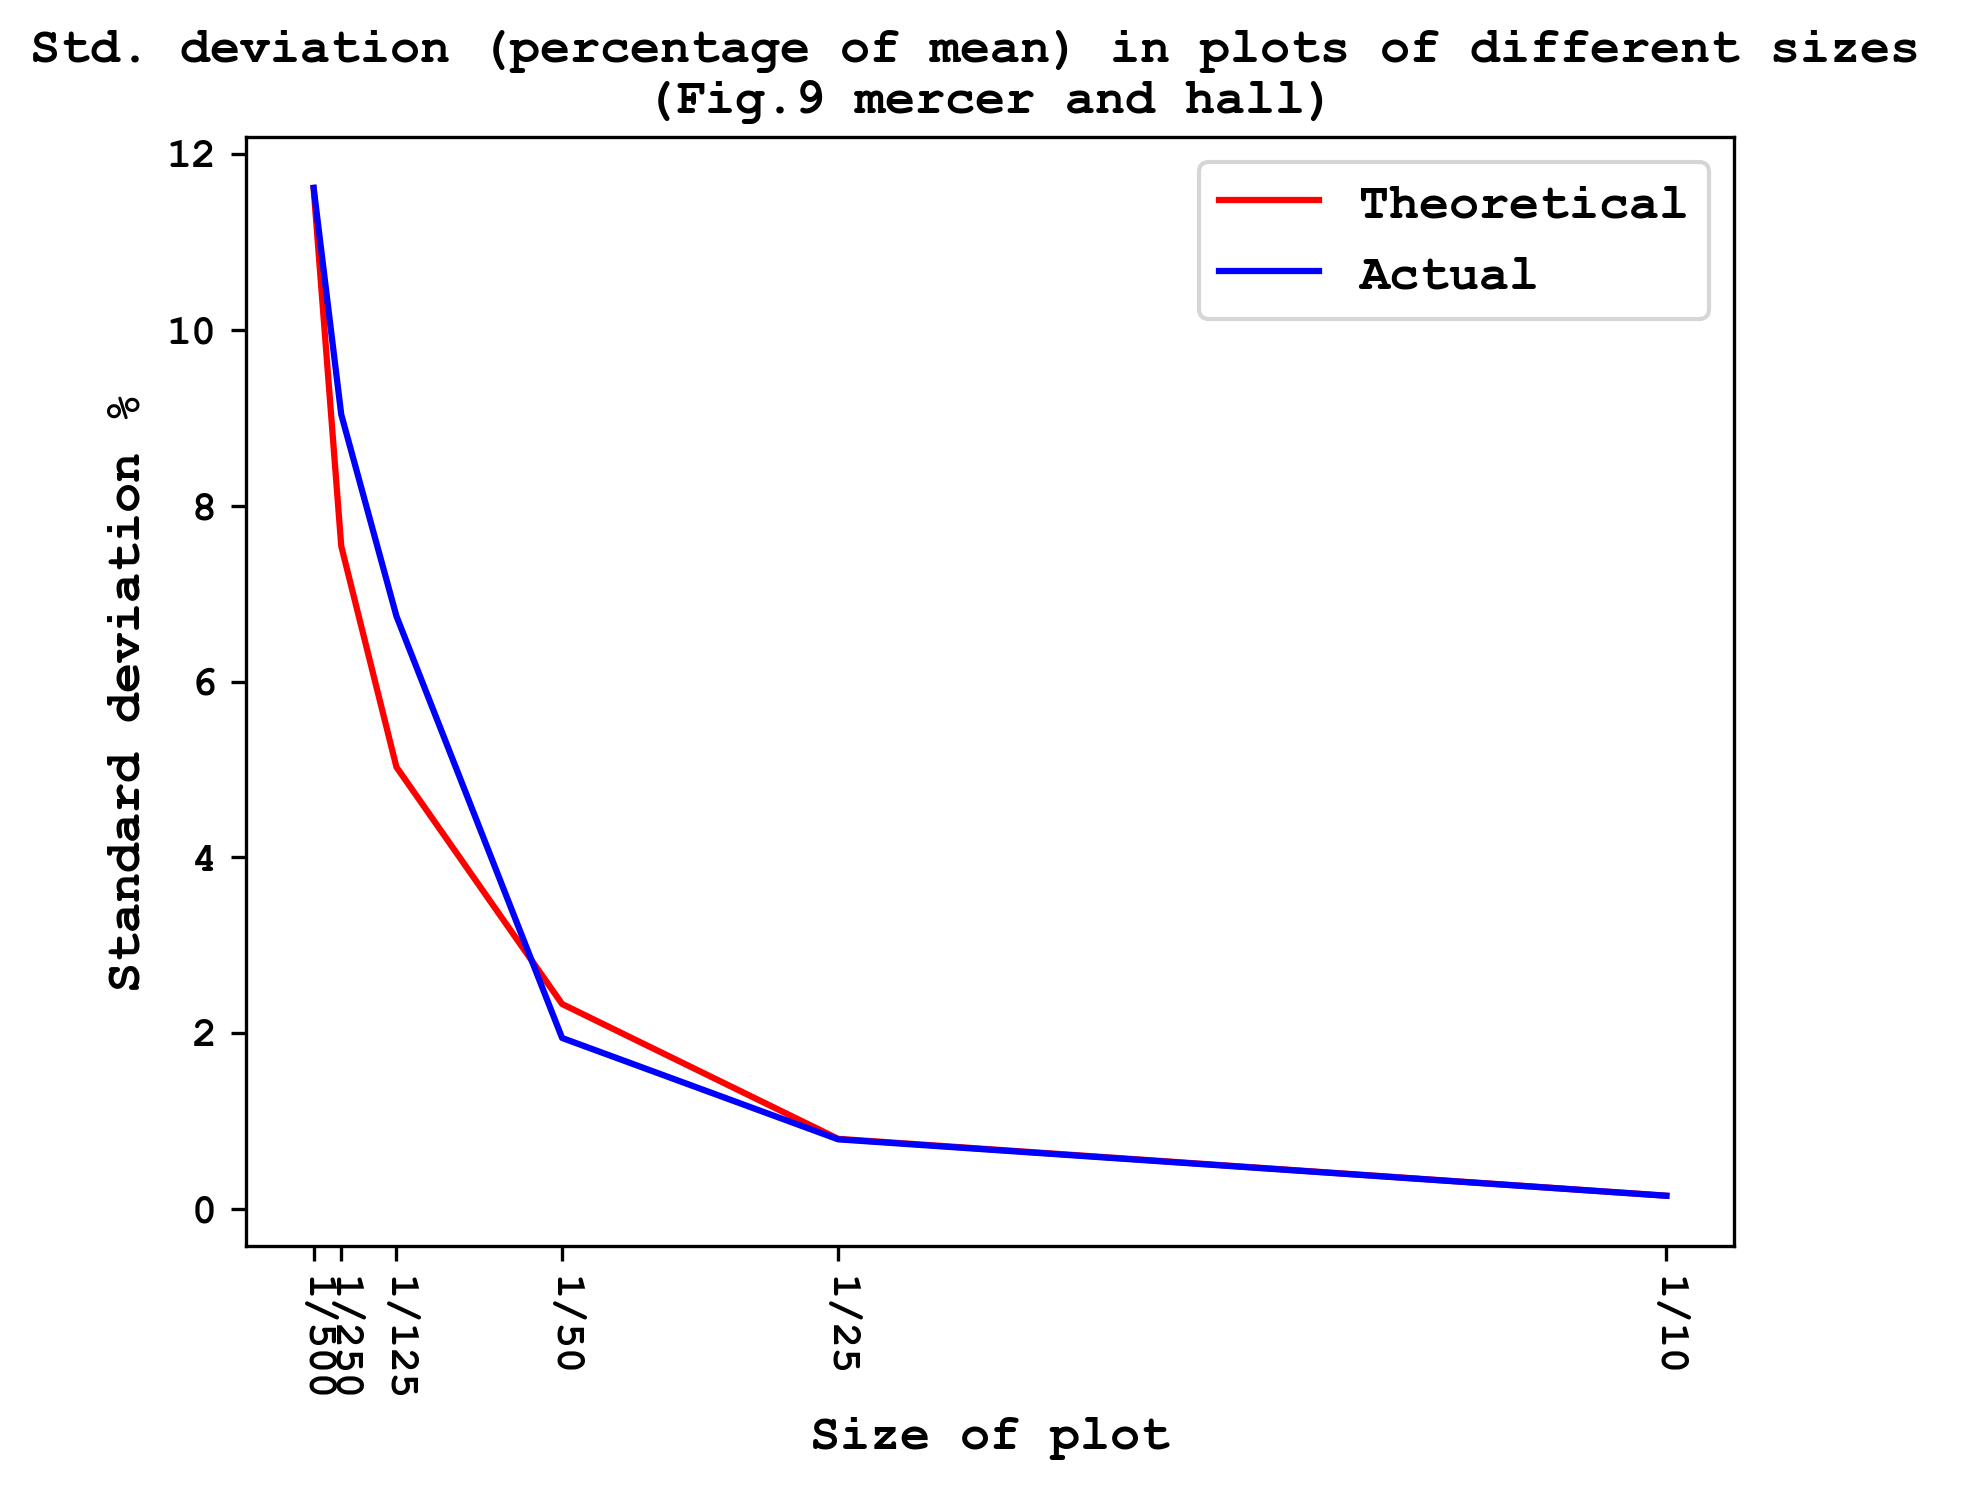

In [72]:
import matplotlib as mpl
plt.rcdefaults()
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.weight"] = "bold"
#plt.xkcd() #poison
#plt.rcdefaults()#antedote

fig, ax =plt.subplots()
ax1=ax
X_tick = [Fraction(item).limit_denominator() for item in output_array]
plt.xticks(np.unique(output_array), X_tick, rotation=270)
ax.plot(output_array,list_sd_th, color="red", alpha=1, label="Theoretical")
ax1.plot(output_array,list_sd, color="blue", alpha=1, label="Actual")
plt.title("Std. deviation (percentage of mean) in plots of different sizes \n (Fig.9 mercer and hall) ",fontweight="bold")
ax.set_ylabel('Standard deviation %', fontsize=12,fontweight="bold")
ax.set_xlabel('Size of plot',fontsize=12,fontweight="bold")
ax.legend(fontsize=12,loc=1)

In [80]:

# the std dev calculator for plot size less than 1/100 in which we do not group the data into 0.1lbs interval groups  
def stdev_lth(plot_s,df_plots_grain):
    df_stdev=df_plots_grain[[plot_s]].copy().dropna()
    df_stdev["group_g"]=df_stdev[plot_s]
    df_stdev_count=df_stdev["group_g"].value_counts().reset_index()
    df_stdev_count.columns=["group_g","count"]
    df_stdev_count=df_stdev_count.sort_values(by="group_g", ascending=True)
    mean_plot=df_stdev[plot_s].sum()/len(df_stdev[plot_s])
    mean_plot=mean_plot.round(2)
    print("mean_plot= ", mean_plot)
    len_col=len(df_stdev_count["group_g"])   

    n=len(df_stdev[plot_s])
    #print(n)
    start=df_stdev_count[df_stdev_count<mean_plot].count()
    index=np.arange(start= (-1*start[0]), stop=len_col-start[0], step =1)
    print("The index column for std dev calculation: ",index)
    df_stdev_count=df_stdev_count.assign(coeff=index)
    df_stdev_count["count\*coeff"]= df_stdev_count["count"]*df_stdev_count["coeff"]
    df_stdev_count["count\*coeff2"]= df_stdev_count["count"]*(df_stdev_count["coeff"]**2)
    v1=(df_stdev_count["count\*coeff"].sum())/n
    v2=(df_stdev_count["count\*coeff2"].sum())/n
    sd=np.sqrt(v2-(v1**2)-(1/(len_col//2)))*np.sqrt(n/(n-1))
    mean=((df_stdev[plot_s].sum())/n)
    sd_p=((sd/mean)*100)
    print("the calculated std_dev :", sd_p)
    return(plot_s, sd_p)



In [83]:
# Creates the list of std dev values for plot size above 1/100 and below 1/100 using tow different methods

list_ps=[]
list_sd=[]
for index in plot_list:
    print(index)
    if int(index.split("/")[1]) >100:
        x=stdev(index,df_plots_grain)
        list_ps.append(x[0])
        list_sd.append(x[1])
    else:
        x=stdev_lth(index,df_plots_grain)
        list_ps.append(x[0])
        list_sd.append(x[1])

print(list_ps, list_sd)


1/500
mean_plots=  3.9
the index column for std dev calculation [-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]
 the calculated standard deviation is:  11.618433074215972
1/250
mean_plots=  7.9
the index column for std dev calculation [-18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1
   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
 the calculated standard deviation is:  9.039506015704255
1/125
mean_plots=  15.8
the index column for std dev calculation [-23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6
  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12
  13  14  15  16  17  18  19  20]
 the calculated standard deviation is:  6.744639492004531
1/50
mean_plot=  39.49
The index column for std dev calculation:  [-25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8
  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  1

In [82]:
# Creates the list of std dev values for plot size above 1/100 and below 1/100 using tow different methods
list_ps_th=[]
list_sd_th=[]
for index in plot_list:
    print(index)
    if int(index.split("/")[1]) >100:
        x=stdev(index,df_th)
        list_ps_th.append(x[0])
        list_sd_th.append(x[1])
    else:
        x=stdev_lth(index,df_th)
        list_ps_th.append(x[0])
        list_sd_th.append(x[1])

print(list_ps_th, list_sd_th)

1/500
mean_plots=  3.9
the index column for std dev calculation [-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]
 the calculated standard deviation is:  11.610865928403442
1/250
mean_plots=  7.9
the index column for std dev calculation [-16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1
   2   3   4   5   6   7   8   9  10  11  12  13]
 the calculated standard deviation is:  7.542439680938704
1/125
mean_plots=  15.9
the index column for std dev calculation [-17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16]
 the calculated standard deviation is:  5.028147279443172
1/50
mean_plot=  39.37
The index column for std dev calculation:  [-26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9
  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9
  10  11  12  13  14  15  16  17  18  19  20  21  22  2

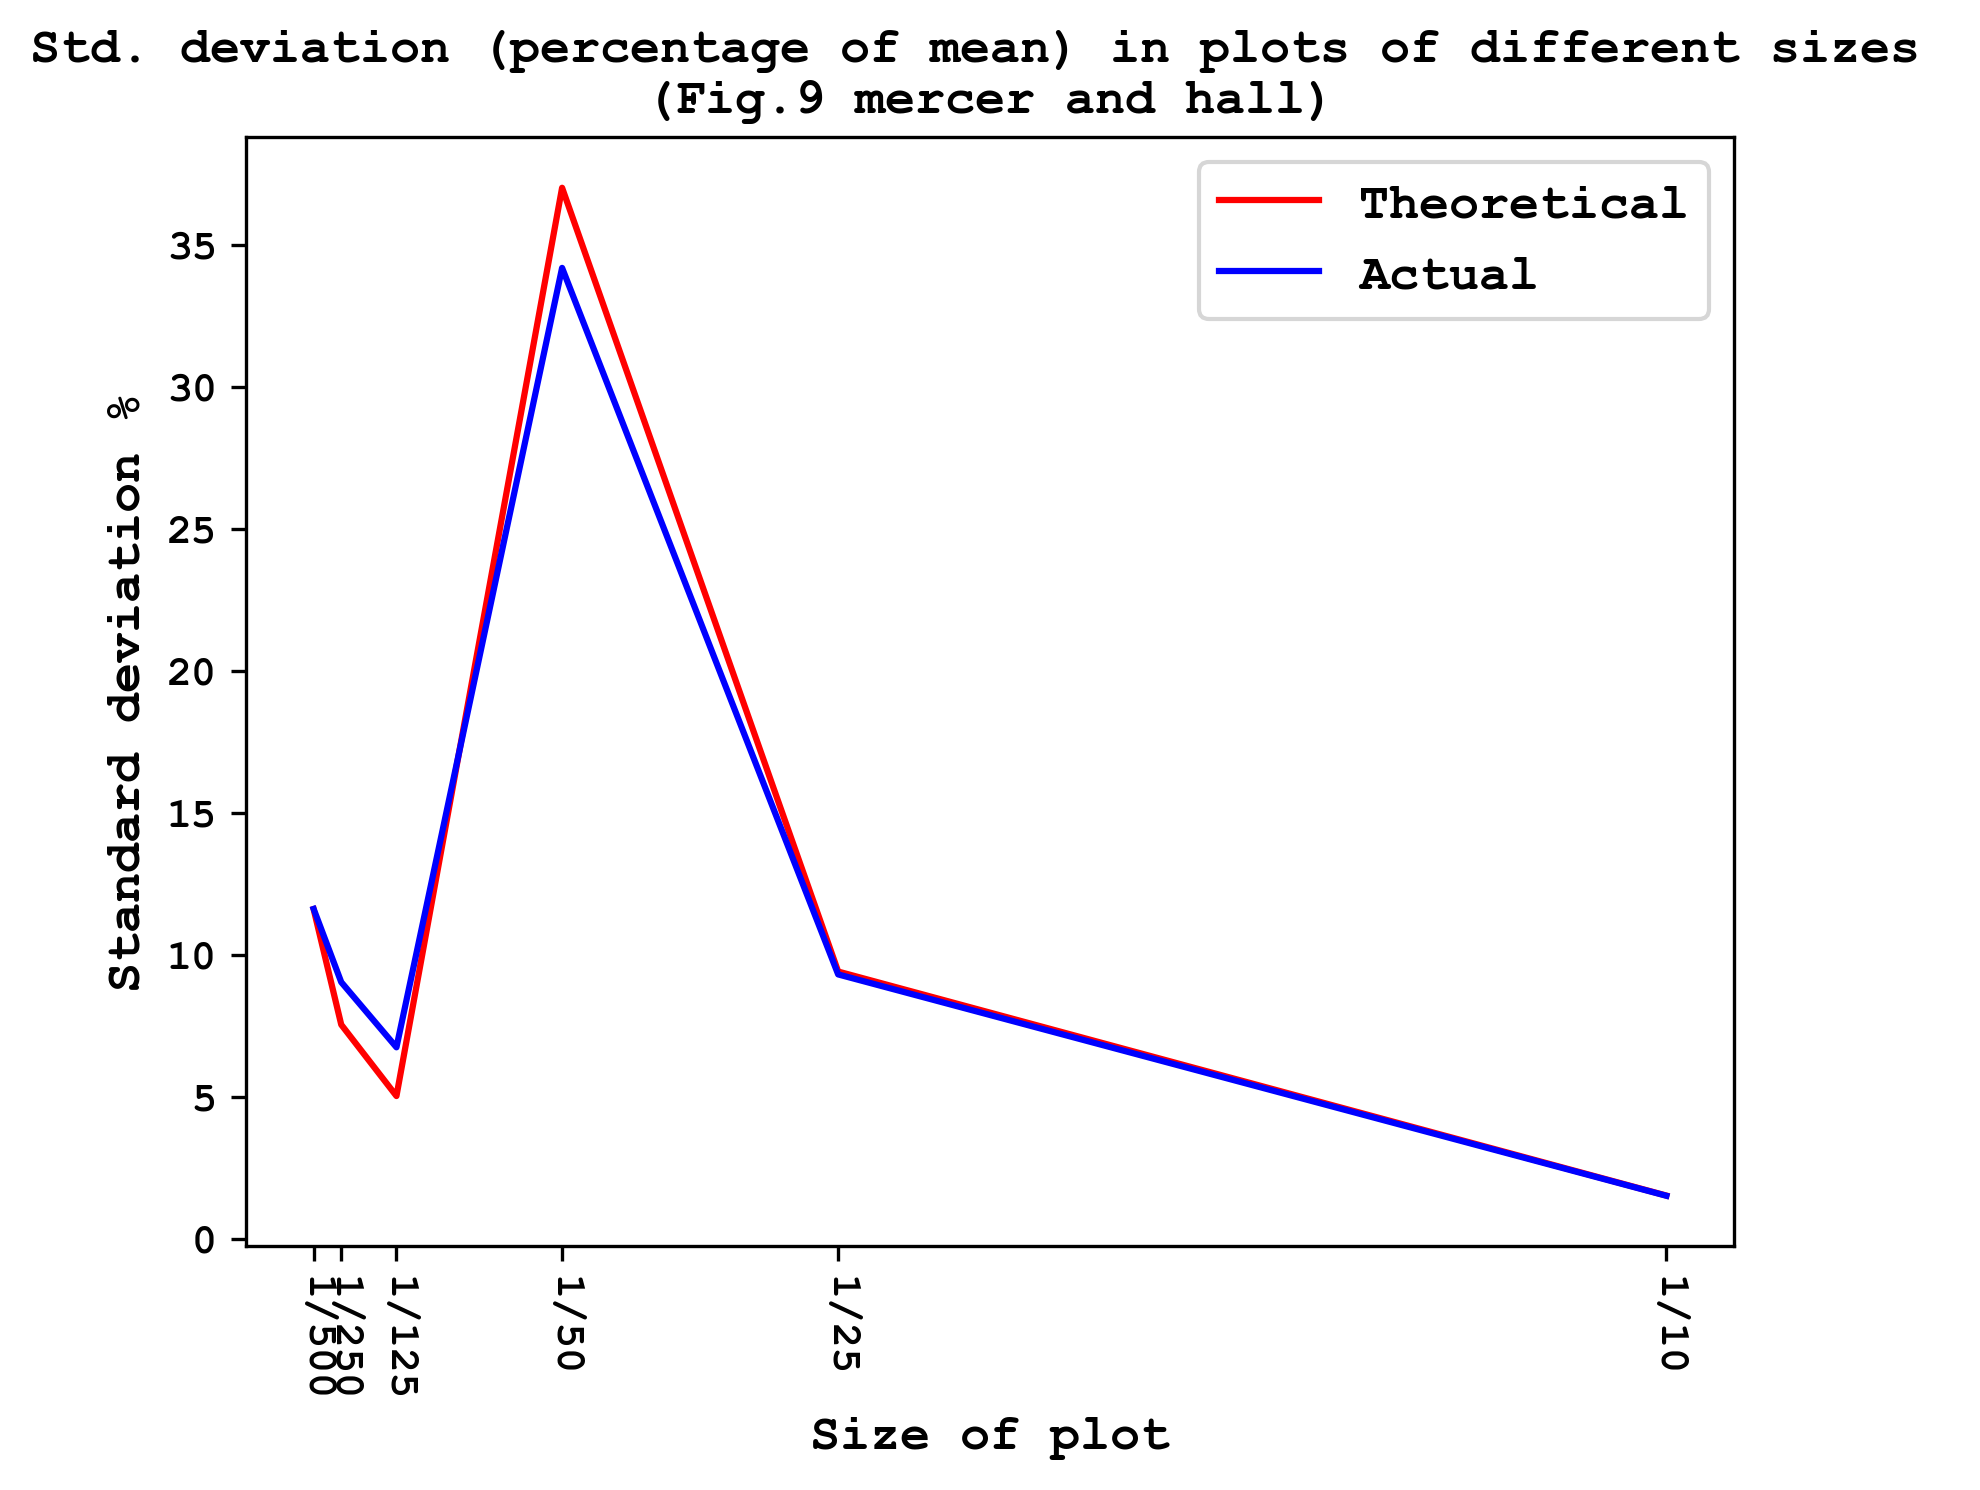

In [84]:
import matplotlib as mpl
plt.rcdefaults()
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.weight"] = "bold"
#plt.xkcd() #poison
#plt.rcdefaults()#antedote

fig, ax =plt.subplots()
ax1=ax
X_tick = [Fraction(item).limit_denominator() for item in output_array]
plt.xticks(np.unique(output_array), X_tick, rotation=270)
ax.plot(output_array,list_sd_th, color="red", alpha=1, label="Theoretical")
ax1.plot(output_array,list_sd, color="blue", alpha=1, label="Actual")
plt.title("Std. deviation (percentage of mean) in plots of different sizes \n (Fig.9 mercer and hall) ",fontweight="bold")
ax.set_ylabel('Standard deviation %', fontsize=12,fontweight="bold")
ax.set_xlabel('Size of plot',fontsize=12,fontweight="bold")
ax.legend(fontsize=12,loc=1)